In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/112_1/MachineLearning/train_new.csv", index_col=0)
test = pd.read_csv("/content/drive/MyDrive/112_1/MachineLearning/test_new.csv", index_col=0)

In [ ]:
train0 = train[train["is_claim"] == 0].sample(1000, random_state=42)
train1 = train[train["is_claim"] == 1].sample(500, random_state=42)
train_new = pd.concat([train0, train1], ignore_index=False)
train_new = train_new.sample(frac=1, random_state=42, ignore_index=False)

In [ ]:
x_train = train_new.drop(["is_claim"], axis="columns")
y_train = train_new["is_claim"]

In [ ]:
def split(x, y, test_size=0.2):
    i = int((1 - test_size) * x.shape[0])
    o = np.random.permutation(x.shape[0])

    x_train, x_test = np.split(np.take(x,o,axis=0), [i])
    y_train, y_test = np.split(np.take(y,o), [i])
    return x_train, x_test, y_train, y_test

In [ ]:
x_linear_train, x_linear_valid, y_linear_train, y_linear_valid = split(x_train, y_train, test_size=0.2)

In [ ]:
x_linear_train = x_linear_train.values
x_linear_valid = x_linear_valid.values
y_linear_train = y_linear_train.values
y_linear_valid = y_linear_valid.values

In [ ]:
import matplotlib.pyplot as plt
import random

In [ ]:
def initialize_weights_and_bias(num_of_feature):
    W = np.full((1, num_of_feature),0.01)
    b = 0.0
    return W,b

def sigmoid(z):
  z = z.astype(float)
  y_head = 1 / (1+np.exp(-z))
  return y_head

def square_loss(y_pred, target):
  return np.mean(pow((y_pred-target),2))

In [ ]:
def forward_backward_propagation(W, b, x_train, y_train):
    y = np.dot(W, x_train.T) + b
    y_head = sigmoid(y)
    loss = (y_train*np.log(y_head))+((1-y_train)*np.log(1-y_head))
    cost = (np.sum(loss)) / (-x_train.shape[0])

    #Backward Propogation
    derivative_weight = (np.dot((y_head-y_train),(x_train)))/x_train.shape[0]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[0]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost, gradients

In [ ]:
def train(W, b, x_train, y_train, learning_rate, num_of_iterarion):
    cost_list = []
    index = []
    for i in range(num_of_iterarion):
        cost, gradients = forward_backward_propagation(W, b, x_train, y_train)
        cost_list.append(cost)
        index.append(i)
        W = W - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    parameters = {"Weight": W,"Bias": b}
    plt.plot(index,cost_list)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [ ]:
def predict(W, b, x_test):
    y = sigmoid(np.dot(W, x_test.T)+b)
    y_pred = np.zeros((1, x_test.shape[0]))

    for i in range(y.shape[0]):
        if y[0,i]< 0.5:
            y_pred[0,i] = 0
        else:
            y_pred[0,i] = 1

    return y_pred

In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate , num_iterations):
    dimension = x_train.shape[0]
    num_of_feature =  x_train.shape[1]

    W,b = initialize_weights_and_bias(num_of_feature)

    parameters, gradients, cost_list = train(W, b, x_train, y_train, learning_rate, num_iterations)

    y_pred_test = predict(parameters["Weight"], parameters["Bias"], x_test)

    accuracy = 0
    for i in range(y_test.shape[0]):
      if y_test[i] == y_pred_test[0][i]:
        accuracy = accuracy + 1
    accuracy = (accuracy/y_test.shape[0])*100

    print("Test Accuracy = ",accuracy, "%")

<ipython-input-11-1bb6c32eb50e>:4: RuntimeWarning: divide by zero encountered in log
  loss = (y_train*np.log(y_head))+((1-y_train)*np.log(1-y_head))
<ipython-input-11-1bb6c32eb50e>:4: RuntimeWarning: invalid value encountered in multiply
  loss = (y_train*np.log(y_head))+((1-y_train)*np.log(1-y_head))
<ipython-input-10-5e602181ccdd>:8: RuntimeWarning: overflow encountered in exp
  y_head = 1 / (1+np.exp(-z))


Cost after iteration 0: nan
Cost after iteration 10: nan
Cost after iteration 20: nan
Cost after iteration 30: nan
Cost after iteration 40: nan
Cost after iteration 50: nan
Cost after iteration 60: nan
Cost after iteration 70: nan
Cost after iteration 80: nan
Cost after iteration 90: nan


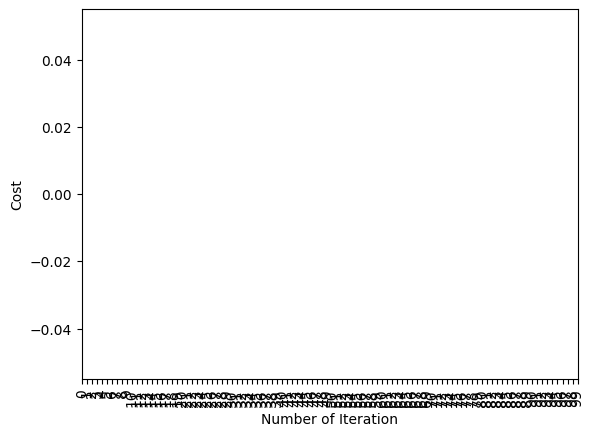

Test Accuracy =  61.66666666666667 %


In [ ]:
logistic_regression(x_linear_train, y_linear_train, x_linear_valid, y_linear_valid,learning_rate = 0.001, num_iterations = 100)